In [1]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [2]:
# 데이터 불러오기
X_train = pd.read_csv('./datasets/workspace_leave/X_train.csv')
y_train = pd.read_csv('./datasets/workspace_leave/y_train.csv')
X_test = pd.read_csv('./datasets/workspace_leave/X_test.csv')
y_test = pd.read_csv('./datasets/workspace_leave/y_test.csv')

### 데이터 확인

In [3]:
X_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73
...,...,...,...,...,...,...,...,...,...,...,...,...
6494,15702806,Martin,696,Spain,Male,24,9,0.00,1,0,0,10883.52
6495,15674179,Vorobyova,513,Germany,Male,34,7,60515.13,1,0,0,124571.09
6496,15790204,Myers,663,Spain,Female,22,9,0.00,1,1,0,29135.89
6497,15690772,Hughes,635,Spain,Female,48,2,0.00,2,1,1,136551.25


In [4]:
y_train

,CustomerId,Exited
0,15799217,0
1,15748986,0
2,15722004,0
3,15780966,0
4,15636731,0
...,...,...
6494,15702806,0
6495,15674179,0
6496,15790204,1
6497,15690772,0


In [5]:
X_test

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15601012,Abdullah,802,France,Female,60,3,92887.06,1,1,0,39473.63
1,15734762,Ignatiev,602,France,Female,56,3,115895.22,3,1,0,4176.17
2,15586757,Anenechukwu,801,France,Female,32,4,75170.54,1,1,1,37898.50
3,15590888,Wade,693,Spain,Female,34,10,107556.06,2,0,0,154631.35
4,15726087,Ch'in,592,France,Female,62,5,0.00,1,1,1,100941.57
...,...,...,...,...,...,...,...,...,...,...,...,...
3496,15733966,Johnstone,496,Germany,Female,55,4,125292.53,1,1,1,31532.96
3497,15669994,Greece,556,Germany,Female,31,1,128663.81,2,1,0,125083.29
3498,15712403,McMillan,589,France,Female,61,1,0.00,1,1,0,61108.56
3499,15643819,Dawson,714,France,Female,25,4,0.00,2,0,0,82500.84


### 데이터 설명

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       6499 non-null   int64  
 1   Surname          6499 non-null   object 
 2   CreditScore      6499 non-null   int64  
 3   Geography        6499 non-null   object 
 4   Gender           6499 non-null   object 
 5   Age              6499 non-null   int64  
 6   Tenure           6499 non-null   int64  
 7   Balance          6499 non-null   float64
 8   NumOfProducts    6499 non-null   int64  
 9   HasCrCard        6499 non-null   int64  
 10  IsActiveMember   6499 non-null   int64  
 11  EstimatedSalary  6499 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 609.4+ KB


* CustomerId : 고객 ID
* Surname : 이름의 성
* CreditScore : 신용점수
* Geography : 국가
* Gender :성별
* Age : 나이
* Tenure : 보유? / 재직기간?
* Balance : 균형...?
* NumOfProducts : 제품 넘버
* HasCrCard : 카드 보유
* IsActiveMember : 정회원
* EstimatedSalary : 추정 봉급

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       3501 non-null   int64  
 1   Surname          3501 non-null   object 
 2   CreditScore      3501 non-null   int64  
 3   Geography        3501 non-null   object 
 4   Gender           3501 non-null   object 
 5   Age              3501 non-null   int64  
 6   Tenure           3501 non-null   int64  
 7   Balance          3501 non-null   float64
 8   NumOfProducts    3501 non-null   int64  
 9   HasCrCard        3501 non-null   int64  
 10  IsActiveMember   3501 non-null   int64  
 11  EstimatedSalary  3501 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 328.3+ KB


In [8]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerId  6499 non-null   int64
 1   Exited      6499 non-null   int64
dtypes: int64(2)
memory usage: 101.7 KB


### Null값 확인

In [9]:
X_train.isna().sum().sum()

0

In [10]:
X_test.isna().sum().sum()

0

### column 별 바 그래프

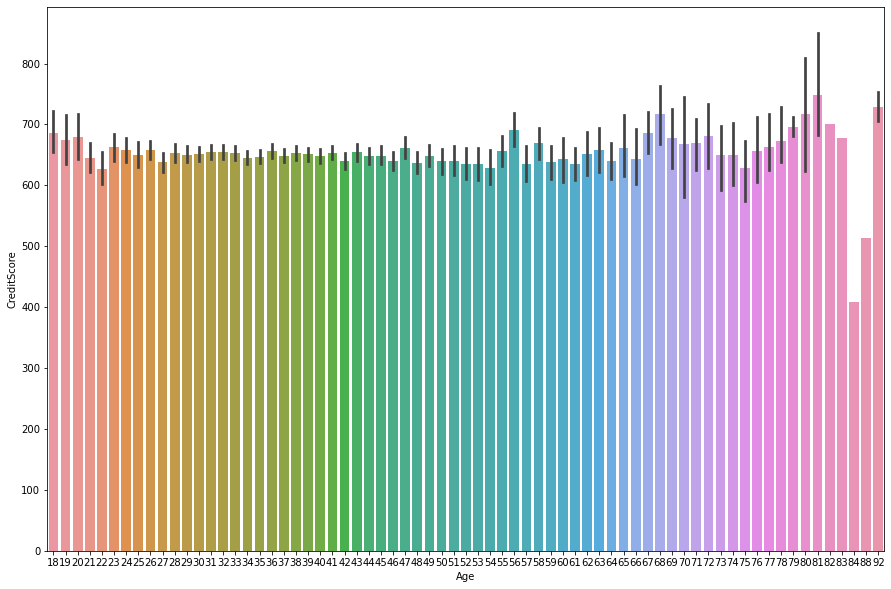

In [11]:
# 나이에 따른 신용점수
plt.figure(figsize=(15,10))
sns.barplot(x=X_train['Age'], y=X_train['CreditScore'])
plt.show()

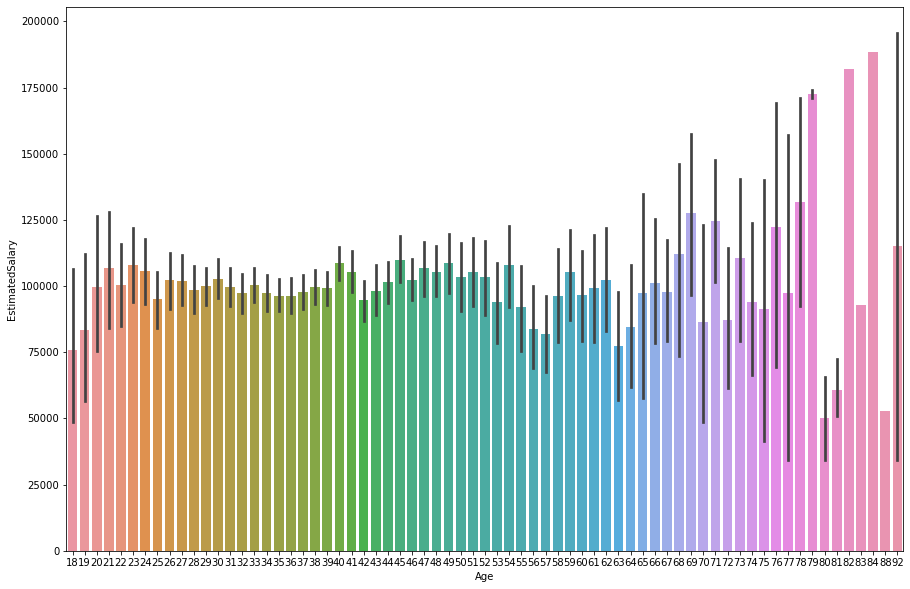

In [12]:
# 나이에 따른 추정 봉급
plt.figure(figsize=(15,10))
sns.barplot(x=X_train['Age'], y=X_train['EstimatedSalary'])
plt.show()

### 성별 전부 앞 자리 대문자로 변환

In [13]:
X_train['Gender'].value_counts()
X_test['Gender'].value_counts()

Male      1839
Female    1562
 male       53
female      47
Name: Gender, dtype: int64

In [14]:
X_train['Gender'] = X_train['Gender'].replace({' male' : 'Male', 'female' : 'Female'})
print(X_train['Gender'].value_counts())

X_test['Gender'] = X_test['Gender'].replace({' male' : 'Male', 'female' : 'Female'})
print(X_test['Gender'].value_counts())

Male      3565
Female    2934
Name: Gender, dtype: int64
Male      1892
Female    1609
Name: Gender, dtype: int64


### 불필요한 데이터 제거

In [15]:
X_train  = X_train.drop(['CustomerId', 'Surname'], axis=1)

Id = X_test['CustomerId']
X_test = X_test.drop(['CustomerId', 'Surname'], axis=1)

y_train = y_train[['Exited']]

In [16]:
X_train, Id, X_test, y_train

(      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0             791   Germany  Female   35       7   52436.20              1   
 1             705   Germany    Male   42       8  166685.92              2   
 2             543    France  Female   31       4  138317.94              1   
 3             709    France  Female   32       2       0.00              2   
 4             714   Germany  Female   36       1  101609.01              2   
 ...           ...       ...     ...  ...     ...        ...            ...   
 6494          696     Spain    Male   24       9       0.00              1   
 6495          513   Germany    Male   34       7   60515.13              1   
 6496          663     Spain  Female   22       9       0.00              1   
 6497          635     Spain  Female   48       2       0.00              2   
 6498          597    France  Female   36       9       0.00              2   
 
       HasCrCard  IsActiveMember  EstimatedSalary 

### describe()

In [17]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,650.396830,38.957070,5.041545,76836.581068,1.519772,0.708878,0.514387,100346.564524
std,96.618957,10.502803,2.891779,62407.570894,0.578975,0.454314,0.499831,57944.655305
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50907.565000
50%,651.000000,37.000000,5.000000,97560.160000,1.000000,1.000000,1.000000,100496.840000
75%,718.000000,44.000000,8.000000,127844.690000,2.000000,1.000000,1.000000,150480.155000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199970.740000


### 수치형 변수 Scaler

In [18]:
X_train['Balance']

0        52436.20
1       166685.92
2       138317.94
3            0.00
4       101609.01
          ...    
6494         0.00
6495     60515.13
6496         0.00
6497         0.00
6498         0.00
Name: Balance, Length: 6499, dtype: float64

In [19]:
X_train[['Balance']]

,Balance
0,52436.20
1,166685.92
2,138317.94
3,0.00
4,101609.01
...,...
6494,0.00
6495,60515.13
6496,0.00
6497,0.00


In [20]:
ss = StandardScaler()

X_train['Balance'] = ss.fit_transform(X_train[['Balance']])
X_train['EstimatedSalary'] = ss.fit_transform(X_train[['EstimatedSalary']])

X_test['Balance'] = ss.fit_transform(X_test[['Balance']])
X_test['EstimatedSalary'] = ss.fit_transform(X_test[['EstimatedSalary']])

### encoder

In [21]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [22]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,791,35,7,-0.391014,1,1,0,1.047721,0,1,0,1,0
1,705,42,8,1.439829,2,1,1,-0.777233,0,1,0,0,1
2,543,31,4,0.985234,1,0,0,-0.664527,1,0,0,1,0
3,709,32,2,-1.231301,2,0,0,0.161110,1,0,0,1,0
4,714,36,1,0.396976,2,1,1,-1.724171,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,696,24,9,-1.231301,1,0,0,-1.544058,0,0,1,0,1
6495,513,34,7,-0.261550,1,0,0,0.418095,0,1,0,0,1
6496,663,22,9,-1.231301,1,1,0,-1.229037,0,0,1,1,0
6497,635,48,2,-1.231301,2,1,1,0.624863,0,0,1,1,0


### train_test_split 진행

In [23]:
X_train_m, X_train_v, y_train_m, y_train_v = train_test_split(X_train, y_train, test_size=0.3, random_state=11)

### 의사결정 트리 알고리즘을 이용해서 학습과 예측 수행

In [24]:
rf_clf = RandomForestClassifier(random_state=11)

rf_clf.fit(X_train_m, y_train_m)
pred_proba = rf_clf.predict_proba(X_train_v)[:,1]
ras = roc_auc_score(y_train_v, pred_proba)

print('roc_auc_score:', ras)

roc_auc_score: 0.8493489822116266


### 제출용 모델 생성 및 예측값 생성

In [25]:
rf_clf.fit(X_train, y_train)
pred_proba2 = rf_clf.predict_proba(X_test)[:,1]

In [26]:
# save = pd.DataFrame({'CustomerId' : id, 'Exited' : pred_proba2})

# save.to_csv('result.csv', index=False)